# Ingeniería de Características (Feature Engineering) de Base de Datos de EMOTHAW

**Proyecto Integrador TC5035.10**

**Profesor Asesor:**
- Dra. Ludivina Facundo (ITESM)


**Profesores Investigadores/Tutores:**
- Dr. Juan Arturo Nolazco (ITESM)
- Dr. Marcos Faunez Zaunuy (TecnoCampus Barcelona)

**Equipo 11:**
- Francisco José Arellano Montes (A01794283)
- Armando Bringas Corpus (A01200230)
- Moisés Díaz Malagón (A01208580)

## Importación de librerías

In [112]:
# Bibliotecas básicas
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pywt
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA

# Bibliotecas para visualización
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos de la fase de EDA

Cargado de los datos preprocesados en la fase de EDA.

TODO: mencionar que en el EDA ya se aleatorizaron los datos con la función train_test_split

In [113]:
def cargar_datos():
    """
    Carga los datos preprocesados del análisis exploratorio
    """
    X_train = pd.read_parquet('../data/raw_binary/X_train.parquet')
    y_train = pd.read_parquet('../data/raw_binary/y_train.parquet')
    X_val = pd.read_parquet('../data/raw_binary/X_val.parquet')
    y_val = pd.read_parquet('../data/raw_binary/y_val.parquet')
    X_test = pd.read_parquet('../data/raw_binary/X_test.parquet')
    y_test = pd.read_parquet('../data/raw_binary/y_test.parquet')
    return X_train, y_train, X_val, y_val, X_test, y_test

In [114]:
X_train, y_train, X_val, y_val, X_test, y_test = cargar_datos()


In [115]:
x_mean = X_train['x'].explode().mean()
x_std = X_train['x'].explode().std()
y_mean = X_train['y'].explode().mean()
y_std = X_train['y'].explode().std()

In [116]:
X_train.head(1)

,homework,pen_status,x,y,azimuth,altitude,pressure
Subject,,,,,,,
126,4,1,"[38473, 38481, 38490, 38499, 38514, 38531, 385...","[15452, 15453, 15454, 15458, 15463, 15469, 154...","[3440, 3440, 3440, 3430, 3430, 3430, 3430, 343...","[540, 540, 540, 540, 540, 540, 540, 540, 540, ...","[16, 24, 25, 29, 29, 31, 35, 42, 55, 70, 80, 9..."


In [136]:
X_train.shape

(476, 7)

In [198]:
X_train['x'] 

Subject
126    [1.0, 1.0002079380344657, 1.0004418683232397, ...
107    [1.3084760741299093, 1.3082421438411354, 1.308...
17     [0.8810854365399111, 0.880591583708055, 0.8804...
25     [0.6875731032152419, 0.6840121643750162, 0.682...
100    [0.9975307358407195, 0.9985704260130481, 0.999...
                             ...                        
49     [1.0075377537493826, 1.0080316065812387, 1.008...
3      [0.9182543602006602, 0.9188001975411327, 0.919...
3      [0.9021391625295662, 0.901151456865854, 0.9010...
54     [1.2437293686481428, 1.2435734151222935, 1.243...
40     [0.7735814727211291, 0.7735814727211291, 0.773...
Name: x, Length: 476, dtype: object

In [204]:
X_train['x'].iloc[0]

array([38473, 38481, 38490, ..., 33315, 33324, 33334], shape=(1953,))

In [137]:
normalized_x = (X_train['x'] - x_mean) / x_std
normalized_y = (X_train['y'] - y_mean) / y_std

In [138]:
normalized_train_df = pd.concat([X_train[['homework','pen_status']], normalized_x, normalized_y], axis=1)

In [11]:
normalized_train_df.head()

,homework,pen_status,x,y
Subject,,,,
126,4,1,"[0.4658252256020692, 0.4664245172768823, 0.467...","[-0.419896948011008, -0.4197981474091503, -0.4..."
107,1,1,"[1.3548744251872404, 1.3542002220530756, 1.353...","[1.4572156866842116, 1.4572156866842116, 1.457..."
17,4,1,"[0.12310529906835183, 0.1216819813406708, 0.12...","[-0.3204047419402629, -0.3213927479588403, -0...."
25,6,0,"[-0.43461051580455, -0.44487338573572366, -0.4...","[-0.6641320358033436, -0.6390366829314773, -0...."
100,3,1,"[0.45870863696366415, 0.4617050953377294, 0.46...","[1.7489738639701204, 1.7489738639701204, 1.748..."


# Data Augmentation

In [12]:
normalized_train_df.iloc[1][['x','y']].values[0].shape
normalized_train_df.iloc[1][['x','y']].values[1].shape

(755,)

In [13]:
original_x_y_arrays = normalized_train_df.iloc[1][['x','y']].values
random_noise_x = np.random.normal(0, 0.01, size=original_x_y_arrays[0].shape)
random_noise_y = np.random.normal(0, 0.01, size=original_x_y_arrays[1].shape)
new_x_data = original_x_y_arrays[0] + random_noise_x  # Add noise
new_y_data = original_x_y_arrays[1] + random_noise_y  # Add noise


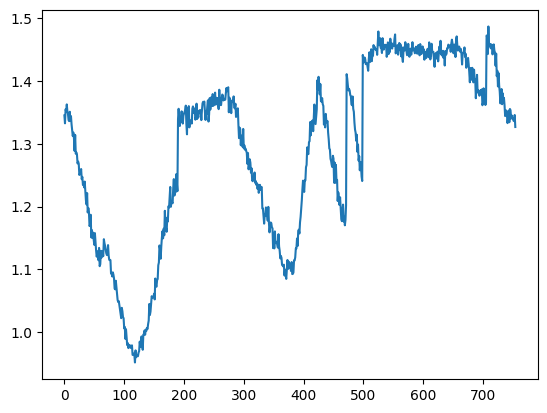

In [14]:
plt.plot(new_x_data)

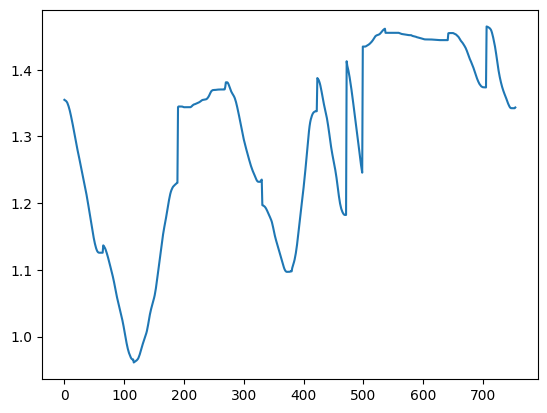

In [15]:
plt.plot(original_x_y_arrays[0])

Elije filas al azar y las aumenta con ruido gaussiano

In [16]:
SCALE = 0.01
PROPORTION = 0.2
np.random.seed(42)

def augment_data(df):
    qty_rows_to_augment = int(PROPORTION * df.shape[0])
    df_augmented = df.copy()

    for _ in range(qty_rows_to_augment):  # Create new N data
        target_row = np.random.randint(0, df.shape[0] - 1)  # Randomly select a row
        original_x_y_arrays = df.iloc[target_row][['x','y']].values

        # Generate Gaussian noise with the same shape as the selected row
        random_noise_x = np.random.normal(0, SCALE, size=original_x_y_arrays[0].shape)
        random_noise_y = np.random.normal(0, SCALE, size=original_x_y_arrays[1].shape)
        new_x_data = original_x_y_arrays[0].shape + random_noise_x  # Add noise
        new_y_data = original_x_y_arrays[1].shape + random_noise_y  # Add noise

        # Convert to DataFrame and maintain original structure
        augmented_row = {
            'x': new_x_data,
            'y': new_y_data,
            'homework': df.iloc[target_row]['homework'],
            'pen_status': df.iloc[target_row]['pen_status'],
        }
        augmented_row = pd.DataFrame([augmented_row])

        # Concatenate the augmented row to the original dataset
        df_augmented = pd.concat([df_augmented, augmented_row], ignore_index=True, axis=0)

    return df_augmented

In [17]:
df_augmented = augment_data(normalized_train_df)

In [18]:
normalized_train_df.shape, df_augmented.shape

((476, 4), (571, 4))

TODO: agregar comentario que se aumento 20% del original (476)

## Ingeniería de Características

### Extracción de Características Wavelet

Implementamos la transformación wavelet para capturar características tanto en frecuencia como temporales:

In [210]:
class WaveletTransformer(BaseEstimator, TransformerMixin):
    '''
    Custom scikit transformer for wavelet transformation of time-series data.
    '''

    def _extract_wavelet_features(self, data_list, wavelet='db4', level=10):
        """
        Aplicar la Transformada Wavelet a una lista de datos y extraer características.

        Parámetros:
        data_list = lista de datos a usar.
        wavelet = transformacion wavelet a usar (Daubechies 4 wavelet)
        level = número de veces que se realiza el proceso de descomposición en una señal o imagen
        """
        coeffs = pywt.wavedec(data_list, wavelet, level=level)
        features = []
        for coef in coeffs:
            features.extend([
                np.mean(coef),
                np.std(coef),
                np.min(coef),
                np.max(coef)
            ])
        return features

    def fit(self, X, y=None):
        # stateless transformer
        self.column_names = list(X.columns)

        return self

    def transform(self, X, y=None):
        return X.apply(self._batch_process)

    def _apply_transformation(self, window, column_name):
        return self._extract_wavelet_features(window)

    def _batch_process(self, column):
        return column.map(lambda col_val: np.array(self._apply_transformation(col_val, column.name)))

    def get_feature_names_out(self, column_names):
        return self.column_names

In [211]:
wavelet_transformer = WaveletTransformer()

numerical_columns = ['x', 'y']

col_transformer = ColumnTransformer([
    ('wavelet', wavelet_transformer, numerical_columns)
], remainder='passthrough')
col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('wavelet', WaveletTransformer(), ['x', 'y'])])

In [212]:
wavelet_train_df = col_transformer.fit_transform(df_augmented)
column_names = [x.split('__')[-1] for x in col_transformer.get_feature_names_out()] # get column names back again
wavelet_train_df = pd.DataFrame(wavelet_train_df, columns=column_names) # transformer generates matrix, convert back to dataframe

/Users/moisesdiaz/Library/Caches/pypoetry/virtualenvs/proyecto-integrador-equipo-11-RpNcPuS5-py3.10/lib/python3.10/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 10 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [213]:
wavelet_train_df

,x,y,homework,pen_status
0,"[12.148005488777903, 4.6113439950059165, 1.858...","[-13.580025434111302, 1.370950774193397, -16.9...",4,1
1,"[43.10940807817892, 1.022130920877796, 41.0475...","[42.39905209640803, 8.715453443123613, 21.8172...",1,1
2,"[3.050218115248705, 1.6621247238320849, -0.878...","[-10.080347079861946, 0.5732943476219098, -10....",4,1
3,"[-15.887530530241712, 2.374410775749709, -21.0...","[-21.698861454684895, 1.5768433667875428, -24....",6,0
4,"[5.716625317682848, 17.310128021243035, -33.80...","[51.69157672039583, 6.411944447410347, 38.8289...",3,1
...,...,...,...,...
566,"[54656.11005251284, 0.04778331888966043, 54656...","[54656.049069048546, 0.03642223394834028, 5465...",6,0
567,"[25600.1061890809, 0.0783055755572367, 25599.9...","[25599.841231014198, 0.1252883900336434, 25599...",3,0
568,"[47519.830010511396, 0.0592690564123985, 47519...","[47520.02086169775, 0.06343797238357611, 47519...",7,0
569,"[50144.01728368786, 0.09089481395011381, 50143...","[50144.08614492718, 0.08725972278907491, 50143...",3,1


Usando la transformada wavelet, las señales x y y se descomponen en 44 características representativas que capturan información estadística (media, desviación estándar, mínimos y máximos) a través de coeficientes wavelet. La wavelet captura patrones en las señales que pueden no ser evidentes en el dominio temporal original.

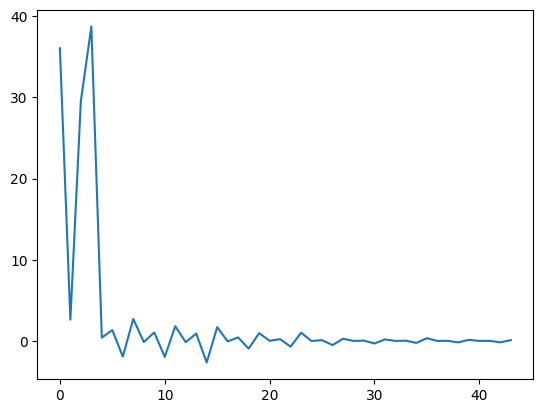

In [214]:
plt.plot(wavelet_train_df.iloc[10]['x'])

Previo a reducir la dimensionalidad, es necesario expandir los array de datos tanto X como Y.

In [215]:
# flatten data
x_train_data = pd.DataFrame(wavelet_train_df['x'].to_list())
y_train_data = pd.DataFrame(wavelet_train_df['y'].to_list())

### LLE

Locally Linear Embedding (LLE) es un algoritmo de reducción de dimensionalidad no lineal que busca preservar la estructura local de los datos. Se basa en la hipótesis de que los datos de alta dimensión están distribuidos en un manifold (una superficie de menor dimensión) y que las relaciones locales entre los puntos se pueden capturar y mantener en un espacio de menor dimensionalidad.

A diferencia de métodos como PCA (Análisis de Componentes Principales), que utiliza una proyección lineal para reducir la dimensionalidad, LLE utiliza las relaciones locales de cada punto con sus vecinos más cercanos. Esto le permite capturar estructuras no lineales presentes en los datos y obtener una representación más precisa de su geometría intrínseca.

Al momento de aplicar LLE para reducir la dimensionalidad, es necesario identificar los valores óptimos de los parámetros clave en el siguiente orden:

1. **`n_neighbors`**: número de vecinos a considerar para la reconstrucción de cada punto, define la estructura local que LLE utilizará para mapear los datos. Si los vecinos no están correctamente seleccionados, el mapeo será incorrecto, sin importar el número de componentes (`n_components`) utilizados. Muy pocos vecinos no pueden captar suficiente información local, mientras que demasiados vecinos pueden incluir relaciones no relevantes.


2. **`n_components`**: número de componentes a extraer. Una vez definido el parámetro `n_neighbors`, que asegura una representación adecuada de la estructura local, es posible enfocarse en cuántas dimensiones retener. Este parámetro está relacionado con la dimensionalidad intrínseca de los datos por lo que, más componentes retienen más información pero también pero pueden introducir redundancia o ruido.

#### Selección de **`n_neighbors`**

In [216]:
def plot_reconstruction_error_neighbors(x_train_data, n_components=35, max_neighbors=20):

    errors = []
    for neighbors in range(2, max_neighbors + 1):
        embedding = LocallyLinearEmbedding(n_components=n_components, n_neighbors=neighbors, eigen_solver='dense')
        embedding.fit(x_train_data)
        errors.append(embedding.reconstruction_error_)

    plt.plot(range(2, max_neighbors + 1), errors)
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Reconstruction Error')
    plt.title('Selecting n_neighbors using Reconstruction Error')
    plt.show()


La función `plot_reconstruction_error_neighbors` permite visualizar el error de reconstrucción en función del número de vecinos para distintos valores de n_neighbors con un número fijo de componentes. En este caso, de acuerdo a la gráfica se puede seleccionar un rango entre 5 a 10 vecinos para minimizar el error de reconstrucción.

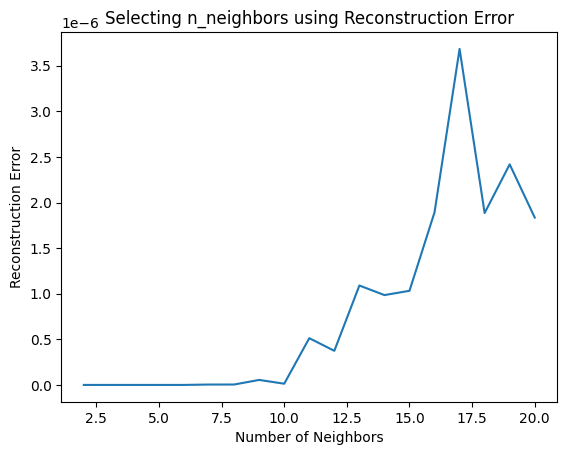

In [217]:
plot_reconstruction_error_neighbors(x_train_data, n_components=6, max_neighbors=20)

#### Selección de **`n_components`**

In [27]:
def plot_lle_reconstruction_errors(x_train_data, max_components=35, n_neighbors=4):
    """
    """
    errors = []
    for n in range(1, max_components + 1):
        embedding = LocallyLinearEmbedding(n_components=n, n_neighbors=n_neighbors, eigen_solver='dense')
        embedding.fit(x_train_data)
        errors.append(embedding.reconstruction_error_)

    plt.plot(range(1, max_components + 1), errors)
    plt.xlabel('Number of Components')
    plt.ylabel('Reconstruction Error')
    plt.title('Selecting n_components using Reconstruction Error')
    plt.show()

La función plot_lle_reconstruction_errors permite visualizar el error de reconstrucción en función del número de componentes seleccionados, el gráfico generado nos permite identificar el "punto de codo" (elbow point) donde agregar más componentes no reduce significativamente el error. En este caso podemos seleccionar entre 20 a 25 componentes.

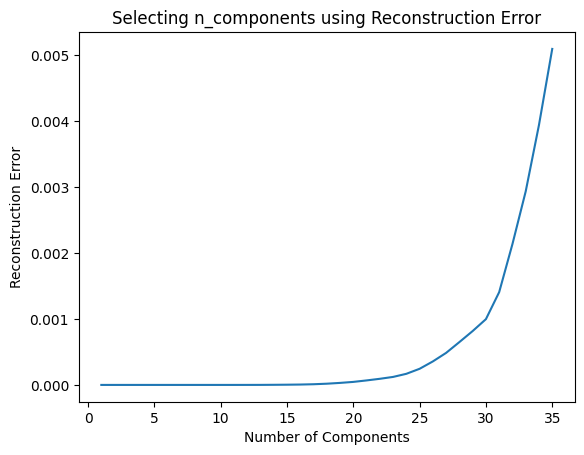

In [28]:
plot_lle_reconstruction_errors(x_train_data, max_components=35, n_neighbors=5)


In [29]:
embedding = LocallyLinearEmbedding(n_components=25, n_neighbors=5)
lle_train_data = embedding.fit_transform(x_train_data)
lle_train_data.shape

(571, 25)

In [30]:
def visualize_multiple_components(X_reduced, num_components=20):
    """
    """
    num_plots = min(num_components, X_reduced.shape[1]) // 2
    rows = (num_plots + 1) // 2  # Dividir las gráficas en dos renglones
    fig, axes = plt.subplots(rows, 2, figsize=(20, 10))
    axes = axes.flatten()

    for i in range(num_plots):
        scatter = axes[i].scatter(X_reduced[:, 2 * i], X_reduced[:, 2 * i + 1], c=X_reduced[:, 2 * i], cmap=plt.cm.Spectral)
        axes[i].set_title(f"Componentes {2 * i + 1} vs {2 * i + 2}")
        axes[i].set_xlabel(f"Componente {2 * i + 1}")
        axes[i].set_ylabel(f"Componente {2 * i + 2}")
        fig.colorbar(scatter, ax=axes[i], orientation='vertical')

    # Eliminar ejes vacíos si num_plots no es par
    for j in range(num_plots, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

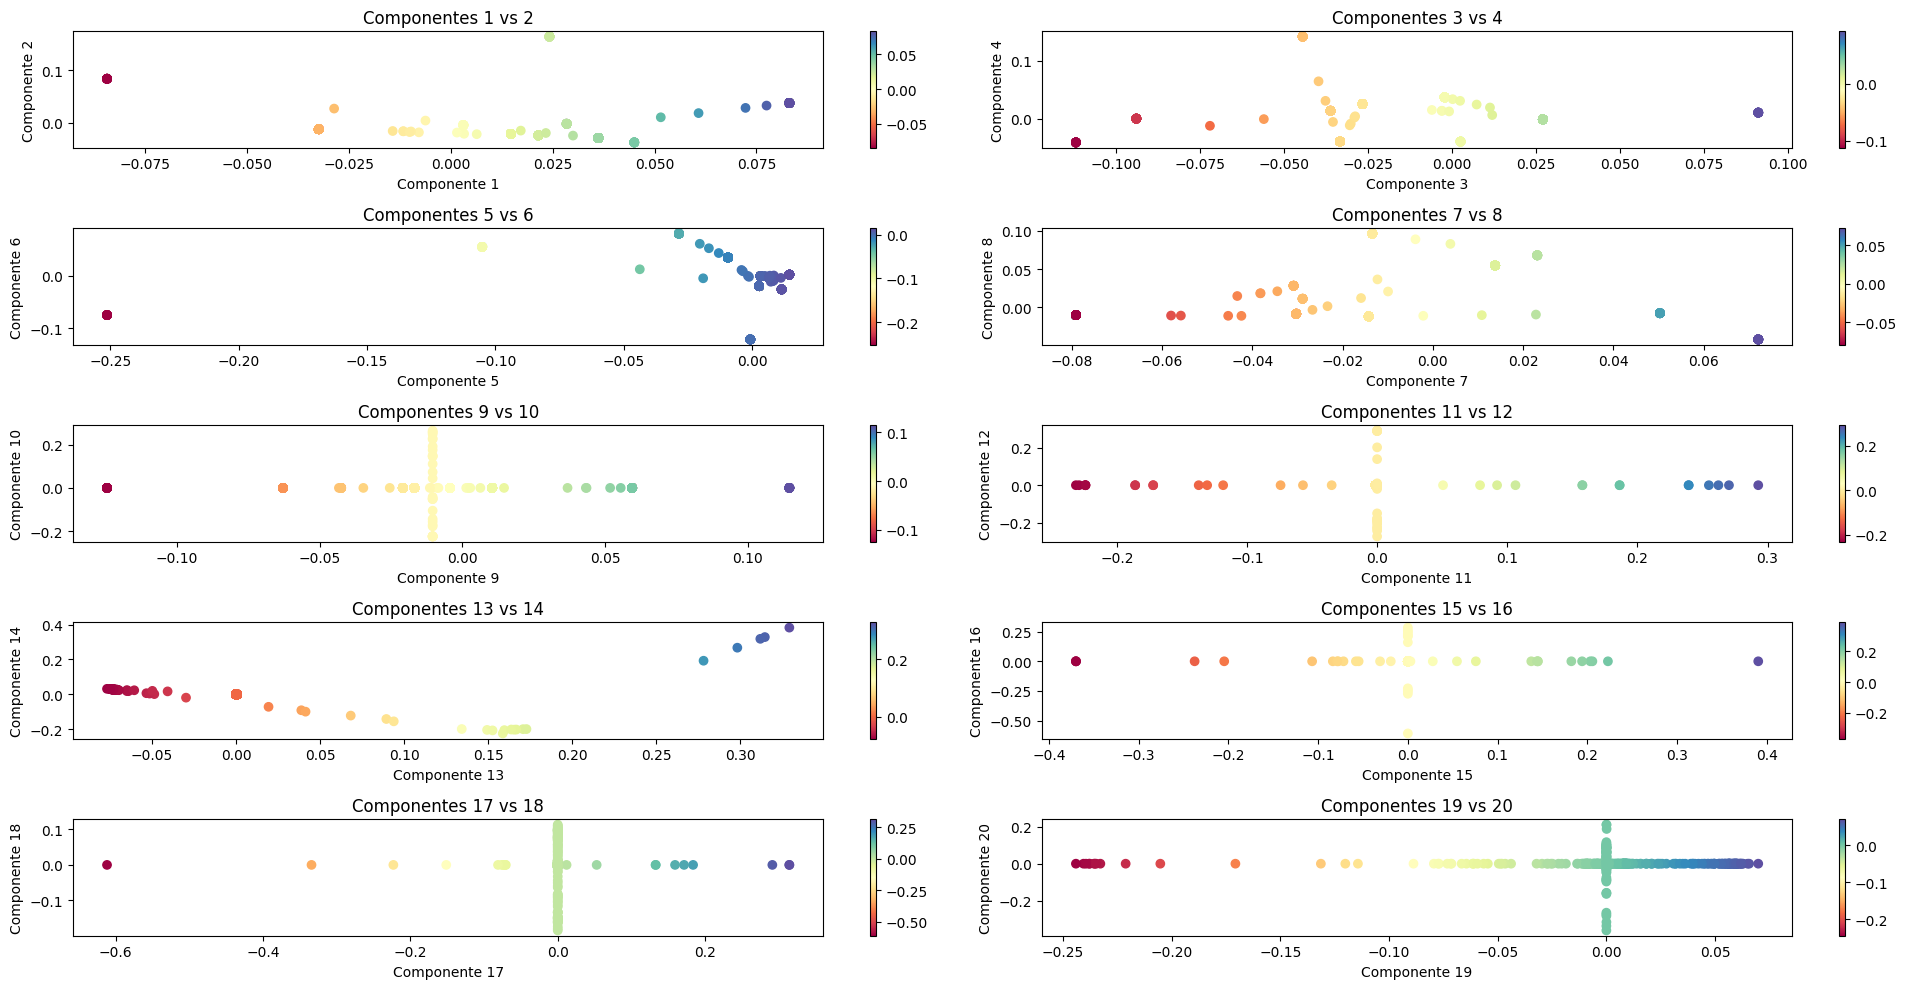

In [31]:
visualize_multiple_components(lle_train_data, num_components=20)

La gráfica representa los datos reducidos utilizando Locally Linear Embedding (LLE). En este caso, las 20 componentes seleccionadas (resultado del análisis de codo) se muestran en pares consecutivos para facilitar su análisis. Cada subgráfico muestra un par de componentes, los pares de componentes se visualizan en ejes X y Y, permitiendo identificar cómo los datos se distribuyen en el espacio reducido.
En cada subgráfico, puedes observar cómo los puntos se agrupan o separan. Al observar que se presentan agrupaciones claras o regiones de densidad, esto quiere decir que las relaciones locales fueron bien preservadas por el LLE.

### **PCA**

De igual manera, similar al LLE, se necesita identificar los valores óptimos de los parámetros:

1.   **Porcentaje de varianza:**

La varianza porcentual es una medida de qué parte de la varianza total en el conjunto de datos es capturada por cada componente principal. Proporciona información sobre cuánta información (o variabilidad) se retiene cuando proyecta sus datos en menos dimensiones.

2.   **Varianza cumulativa**:
La varianza acumulada es el total acumulado de la varianza explicada por los componentes principales en PCA. Indica qué parte de la varianza total se captura al combinar los primeros n componentes principales.


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train_data)

 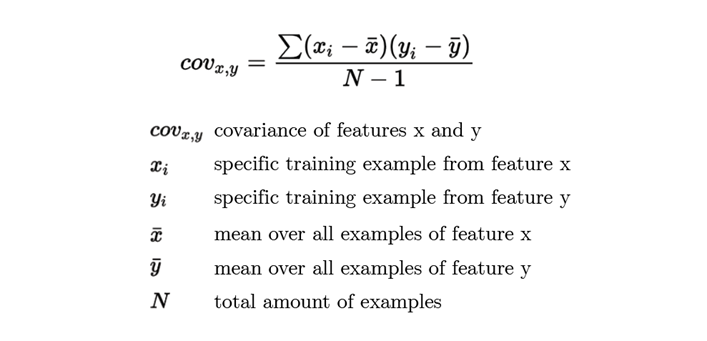


La fórmula usa la matriz de covarianza, los valores propios indican la cantidad de varianza capturada por cada componente principal. Cuanto mayor es el valor, incrementa la varianza en los componentes principales. El vector propio asociado con el valor propio más grande define la dirección en la que los datos varían más.

Al preservar la varianza, asegura que la estructura e los datos se mantenga inclusive cuando se reduce dimensionalidad, es por eso por lo que PCA es sensible a la variación de datos, en este caso a los datos que no están normalizados.


PCA es sensible a la variación de cada característica, lo que significa que las características con rangos más grandes dominarán los componentes principales. Para evitar esto, es importante estandarizar los datos antes de aplicar PCA. La estandarización transforma los datos para que todas las características contribuyan por igual al PCA.

In [38]:
# Entrenamos nuestros datos actuales usando el metodo PCA
variance_percentage = 0.90
pca = PCA()
pca.fit(X_scaled)

# Obtenemos la varianza cumulativa
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
print("Varianza cumulativa:", len(cumulative_variance))

# Obtencion de n_componentes o el numer de componentes
n_components = np.argmax(cumulative_variance >= variance_percentage) + 1
print(f"Componentes necesarios para retener: {variance_percentage*100}%, varianza: {n_components}")

Varianza cumulativa: 44
Componentes necesarios para retener: 90.0%, varianza: 16


En estas siguientes líneas de código, se sigue el siguiente proceso:

Entrenamos los datos actuales, ahora obtenemos el radio de varianza, usando el método explained_variance_ratio_, una vez obtenido el radio de varianza podemos sumar los valores y obtener la varianza cumulativa. De aquí podemos el número de componentes obteniendo el numero de valores que no se pasen del porcentaje de varianza

La varianza acumulada ayuda a determinar la cantidad de componentes necesarios para retener una cantidad deseada de información (por ejemplo, 95% o 99% de la varianza total). Garantiza la reducción de dimensionalidad sin pérdida significativa de información.


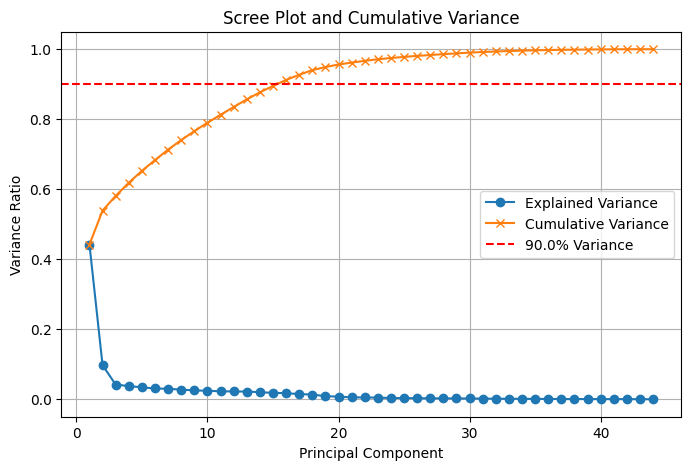

In [40]:
# Plot Screen Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Explained Variance')
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='x', label='Cumulative Variance')
plt.axhline(y=variance_percentage, color='r', linestyle='--', label=f'{variance_percentage*100}% Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.title('Scree Plot and Cumulative Variance')
plt.legend()
plt.grid()
plt.show()

En la siguiente grafica podemos observar que solo es necesario 16 componentes para el 90% de la varianza

In [39]:
pca = PCA(n_components=6)
pca_train_data = pca.fit_transform(x_train_data)
pca_train_data.shape

(571, 6)


Sabiendo el numero de componentes necesarios podemos ahora aplicar el PCA para nuestros valores actuales.

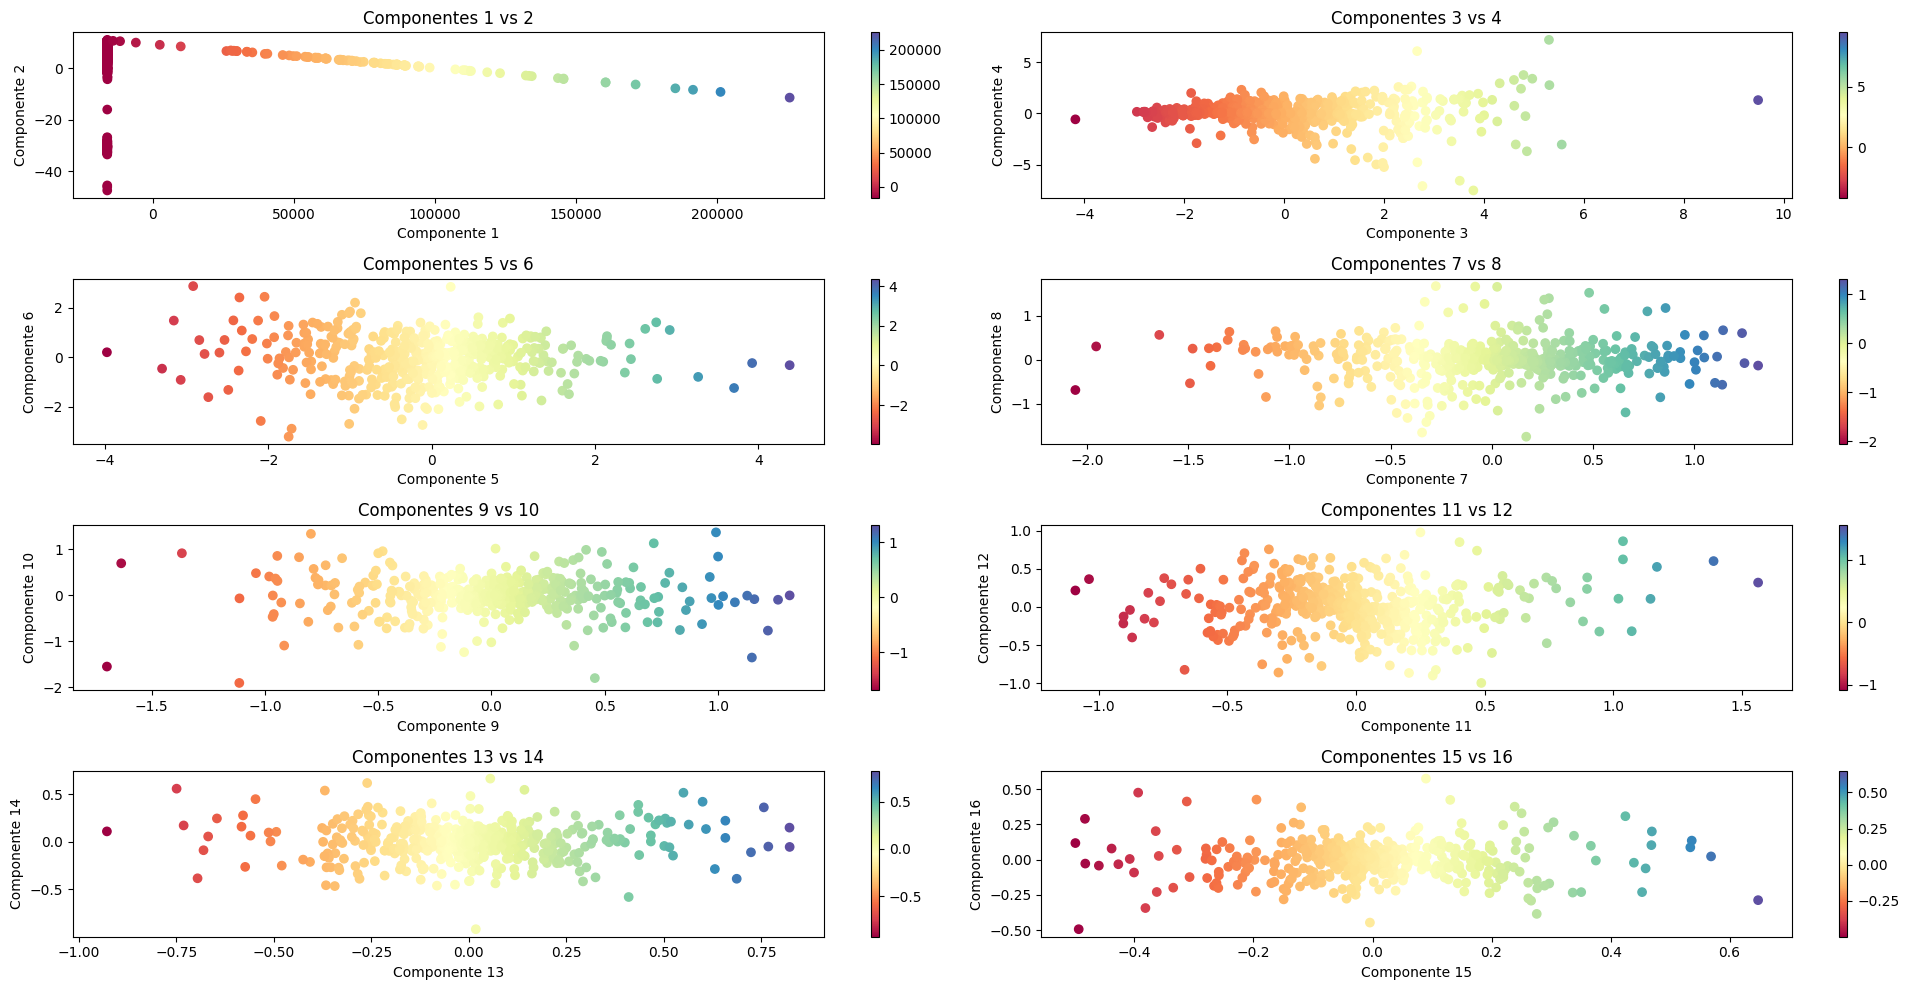

In [42]:
visualize_multiple_components(pca_train_data, num_components=20)

La gráfica representa los datos reducidos utilizando Principal Component Analysis (PCA).
La grafica superior izquierda muestra una dispersión significativa a lo largo del Componente 1, que probablemente captura la mayor parte de la variación. El Componente 2 tiene una variación mínima en comparación con el Componente 1, como se refleja en su distribución más compacta. Las gráficas como los Componentes 5 frente a 6 y los Componentes 7 frente a 8 muestran distribuciones más equilibradas, lo que sugiere que representan variaciones más pequeñas pero significativas en el conjunto de datos.

Los gráficos se vuelven progresivamente más ajustados y agrupados a medida que se pasa a componentes superiores (por ejemplo, componentes 13 a 16), lo que indica que estos componentes capturan muy poca varianza.


## Implementación del Pipeline

In [305]:
from sklearn.preprocessing import StandardScaler

class StandardScalerTSTransformer(BaseEstimator, TransformerMixin):
    '''
    Custom scikit scaler transformer for time-series data.
    '''

    def fit(self, X, y=None):
        self.x_mean = X['x'].explode().mean()
        self.x_std = X['x'].explode().std()
        self.y_mean = X['y'].explode().mean()
        self.y_std = X['y'].explode().std()
        self.column_names = list(X.columns)

        return self

    def transform(self, X, y=None):
        normalized_x = (X['x'].to_list() - self.x_mean) / self.x_std
        normalized_y = (X['y'].to_list() - self.y_mean) / self.y_std

        new_x_column = list(pd.DataFrame(normalized_x).values)
        new_y_column = list(pd.DataFrame(normalized_y).values)
        transformed_columns = pd.DataFrame([new_x_column, new_y_column]).T
        transformed_columns.columns = self.column_names

        return transformed_columns

    def get_feature_names_out(self, column_names):
        return self.column_names


std_scaler = StandardScalerTSTransformer()

col_transformer = ColumnTransformer([
    ('stdscaler', std_scaler, ['x','y'])
], remainder='passthrough')

df_norm = col_transformer.fit_transform(wavelet_train_df)
column_names = [x.split('__')[-1] for x in col_transformer.get_feature_names_out()] # get column names back again
X_train_norm = pd.DataFrame(df_norm, columns=column_names) # transformer generates matrix, convert back to dataframe

In [306]:
class LLETransformer(BaseEstimator, TransformerMixin):
    '''
    Custom scikit transformer LLE transformation of time-series data.
    '''

    def fit(self, X, y=None):
        self.column_names = list(X.columns)
        return self

    def transform(self, X, y=None):
        self.x_train_data = pd.DataFrame(X['x'].to_list())
        self.y_train_data = pd.DataFrame(X['y'].to_list())
        
        x_embedding = LocallyLinearEmbedding(n_components=6, n_neighbors=4, eigen_solver='dense')
        y_embedding = LocallyLinearEmbedding(n_components=6, n_neighbors=4, eigen_solver='dense')

        x_lle_data = x_embedding.fit_transform(self.x_train_data)
        y_lle_data = y_embedding.fit_transform(self.y_train_data)


        new_x_column = list(pd.DataFrame(x_lle_data).values)
        new_y_column = list(pd.DataFrame(x_lle_data).values)
        transformed_columns = pd.DataFrame([new_x_column, new_y_column]).T

        return transformed_columns

    def get_feature_names_out(self, column_names):
        return self.column_names


lle_transformer = LLETransformer()

col_transformer = ColumnTransformer([
    ('lle', lle_transformer, ['x','y'])
], remainder='passthrough')

df_lle = col_transformer.fit_transform(wavelet_train_df)
column_names = [x.split('__')[-1] for x in col_transformer.get_feature_names_out()] # get column names back again
X_train_lle = pd.DataFrame(df_lle, columns=column_names) # transformer generates matrix, convert back to dataframe

In [307]:
class PCATransformer(BaseEstimator, TransformerMixin):
    '''
    Custom scikit transformer PCA transformation of time-series data.
    '''

    def fit(self, X, y=None):
        self.column_names = list(X.columns)
        return self

    def transform(self, X, y=None):
        self.x_train_data = pd.DataFrame(X['x'].to_list())
        self.y_train_data = pd.DataFrame(X['y'].to_list())

        x_pca = PCA(n_components=6)
        y_pca = PCA(n_components=6)

        x_pca_data = x_pca.fit_transform(self.x_train_data)
        y_pca_data = y_pca.fit_transform(self.y_train_data)


        new_x_column = list(pd.DataFrame(x_pca_data).values)
        new_y_column = list(pd.DataFrame(y_pca_data).values)
        transformed_columns = pd.DataFrame([new_x_column, new_y_column]).T

        return transformed_columns

    def get_feature_names_out(self, column_names):
        return self.column_names


pca_transformer = PCATransformer()

col_transformer = ColumnTransformer([
    ('lle', pca_transformer, ['x','y'])
], remainder='passthrough')

df_pca = col_transformer.fit_transform(wavelet_train_df)
column_names = [x.split('__')[-1] for x in col_transformer.get_feature_names_out()] # get column names back again
X_train_pca = pd.DataFrame(df_pca, columns=column_names) # transformer generates matrix, convert back to dataframe

In [314]:
def create_preprocessing_pipeline(reduction_method='lle'):
    columnas_numericas = ['x', 'y']
    preprocessing_pipeline = None
    if reduction_method == 'lle':
        preprocessing_pipeline = Pipeline([
            ('wavelet', WaveletTransformer()),
            ('lle', LLETransformer())
        ])
    elif reduction_method == 'pca':
        preprocessing_pipeline = Pipeline([
            ('wavelet', WaveletTransformer()),
            ('norm', StandardScalerTSTransformer()),
            ('pca', PCATransformer())
        ])

    preprocesador = ColumnTransformer(
        transformers=[
            ('numericas', preprocessing_pipeline, columnas_numericas)
        ],
        remainder='passthrough'
    )
    return preprocesador

In [317]:
# Crear y ajustar pipeline
pipeline = create_preprocessing_pipeline(reduction_method='lle')
X_train_preprocessed = pipeline.fit_transform(df_augmented)
X_val_preprocessed = pipeline.transform(X_val)
X_test_preprocessed = pipeline.transform(X_test)

# Convertir a DataFrame para mejor manejo
columns = [f'caracteristica_{i}' for i in range(X_train_preprocessed.shape[1])]
X_train_transformed = pd.DataFrame(X_train_preprocessed, columns=columns)
X_val_transformed = pd.DataFrame(X_val_preprocessed, columns=columns)
X_test_transformed = pd.DataFrame(X_test_preprocessed, columns=columns)

# Mostrar dimensiones y primeras filas
print("Dimensiones después de la transformación:")
print(f"Train: {X_train_transformed.shape}")
print(f"Validación: {X_val_transformed.shape}")
print(f"Test: {X_test_transformed.shape}")



/Users/moisesdiaz/Library/Caches/pypoetry/virtualenvs/proyecto-integrador-equipo-11-RpNcPuS5-py3.10/lib/python3.10/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 10 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/Users/moisesdiaz/Library/Caches/pypoetry/virtualenvs/proyecto-integrador-equipo-11-RpNcPuS5-py3.10/lib/python3.10/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 10 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/Users/moisesdiaz/Library/Caches/pypoetry/virtualenvs/proyecto-integrador-equipo-11-RpNcPuS5-py3.10/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/moisesdiaz/Library/Caches/pypoetry/virtualenvs/proyecto-integrador-equipo-

Dimensiones después de la transformación:
Train: (571, 4)
Validación: (556, 4)
Test: (556, 4)


/Users/moisesdiaz/Library/Caches/pypoetry/virtualenvs/proyecto-integrador-equipo-11-RpNcPuS5-py3.10/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


## Conclusiones

## Referencias